![alt text](https://engmrk.com/wp-content/uploads/2018/09/LeNet_Original_Image.jpg)

![alt text](https://engmrk.com/wp-content/uploads/2018/09/LeNEt_Summary_Table.jpg)

In [1]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [2]:
import torchvision.datasets

In [3]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)


In [4]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/home/worker/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/worker/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/home/worker/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/worker/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [5]:
len(y_train), len(y_test)

(60000, 10000)

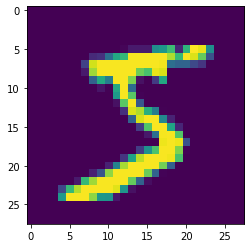

tensor(5)


In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [8]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [9]:
X_train.shape

torch.Size([60000, 1, 28, 28])

In [142]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=12, kernel_size=5, padding=2)
        self.act1  = torch.nn.ELU()
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
       
        self.conv2 = torch.nn.Conv2d(
            in_channels=12, out_channels=12, kernel_size=3, padding=0)
        self.conv3 = torch.nn.Conv2d(
            in_channels=12, out_channels=36, kernel_size=3, padding=0
        )
        self.act2  = torch.nn.ReLU()
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc1   = torch.nn.Linear(5 * 5 * 36, 120)
        self.act3  = torch.nn.ELU()
        
        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.ELU()
        
        self.fc3   = torch.nn.Linear(84, 10)
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        
        return x
    
lenet5 = LeNet5()

In [143]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5 = lenet5.to(device)

In [144]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(lenet5.parameters(), lr=1.0e-3, momentum=0.7)

In [145]:
batch_size = 512

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(50):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = lenet5.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    test_preds = lenet5.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)
    
    print("epoch", epoch, accuracy)

epoch 0 tensor(0.9108)
epoch 1 tensor(0.9496)
epoch 2 tensor(0.9578)
epoch 3 tensor(0.9608)
epoch 4 tensor(0.9704)
epoch 5 tensor(0.9702)
epoch 6 tensor(0.9754)
epoch 7 tensor(0.9702)
epoch 8 tensor(0.9744)
epoch 9 tensor(0.9782)
epoch 10 tensor(0.9777)
epoch 11 tensor(0.9791)
epoch 12 tensor(0.9757)
epoch 13 tensor(0.9768)
epoch 14 tensor(0.9784)
epoch 15 tensor(0.9813)
epoch 16 tensor(0.9838)
epoch 17 tensor(0.9796)
epoch 18 tensor(0.9761)
epoch 19 tensor(0.9830)
epoch 20 tensor(0.9842)
epoch 21 tensor(0.9849)
epoch 22 tensor(0.9833)
epoch 23 tensor(0.9855)
epoch 24 tensor(0.9843)
epoch 25 tensor(0.9836)
epoch 26 tensor(0.9843)
epoch 27 tensor(0.9853)
epoch 28 tensor(0.9865)
epoch 29 tensor(0.9854)
epoch 30 tensor(0.9863)
epoch 31 tensor(0.9830)
epoch 32 tensor(0.9870)
epoch 33 tensor(0.9856)
epoch 34 tensor(0.9858)
epoch 35 tensor(0.9844)
epoch 36 tensor(0.9868)
epoch 37 tensor(0.9858)
epoch 38 tensor(0.9867)
epoch 39 tensor(0.9866)
epoch 40 tensor(0.9869)
epoch 41 tensor(0.9861)
ep

In [15]:
lenet5.forward(X_test)

tensor([[ -3.3555,  -1.2863,  -1.0798,  ...,  20.4755,  -7.3103,   3.6148],
        [  1.5130,   3.4617,  20.1233,  ...,  -2.6944,   1.8981, -12.9511],
        [ -0.7949,  20.5158,  -2.9643,  ...,   3.9183,  -1.0887,  -4.9172],
        ...,
        [ -7.0197,  -1.9791,  -2.5727,  ...,   2.9114,  -1.2514,   3.5956],
        [  2.6092,  -0.9237, -10.1183,  ...,  -6.7756,   5.9718,  -4.2212],
        [  5.9334,  -3.9665,  -1.1233,  ..., -11.0377,   3.0729,  -5.4874]],
       device='cuda:0', grad_fn=<AddmmBackward>)

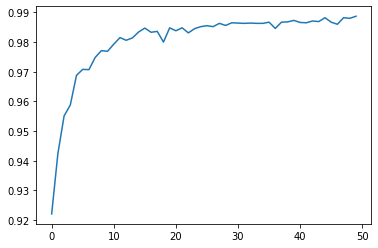

In [141]:
plt.plot(test_accuracy_history)
#plt.plot(test_loss_history);